In [96]:
# import sys

In [97]:
# !{sys.executable} -m pip install googlemaps

In [98]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import re
import os 
import googlemaps
import re
import numpy as np

In [99]:
final_df = pd.read_csv(r"weather_data.csv")

In [100]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [101]:
final_df.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Admiralty,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.8,24.3,10.8,34.2
1,Admiralty,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.7,24.6,11.5,38.2
2,Admiralty,2014,1,3,4.6,4.4,4.4,4.6,26.5,29.5,24.9,9.7,34.2
3,Admiralty,2014,1,4,3.8,3.8,3.8,3.8,26.4,31.2,24.7,8.1,32.8
4,Admiralty,2014,1,5,3.6,1.2,1.6,2.0,24.6,25.3,23.6,8.4,27.0


In [102]:
final_df.tail()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
89893,Whampoa,2018,12,27,0.0,0.0,0.0,0.0,,,,,
89894,Whampoa,2018,12,28,0.0,0.0,0.0,0.0,,,,,
89895,Whampoa,2018,12,29,0.0,0.0,0.0,0.0,,,,,
89896,Whampoa,2018,12,30,0.4,0.4,0.4,0.4,,,,,
89897,Whampoa,2018,12,31,9.8,3.4,4.2,7.4,,,,,


### Getting Latitude and Longitude

In [103]:
api_key = ''
gmaps = googlemaps.Client(key=api_key)

In [104]:
station_list = final_df['Station'].unique()

In [105]:
station_list

array(['Admiralty', 'Ang Mo Kio', 'Botanic Garden', 'Bukit Panjang',
       'Bukit Timah', 'Buona Vista', 'Chai Chee', 'Changi',
       'Choa Chu Kang (Central)', 'Choa Chu Kang (South)', 'Clementi',
       'Dhoby Ghaut', 'East Coast Parkway', 'Jurong (West)',
       'Jurong Island', 'Jurong Pier', 'Kent Ridge', 'Kranji Reservoir',
       'Lim Chu Kang', 'Lower Peirce Reservoir', 'Macritchie Reservoir',
       'Mandai', 'Marina Barrage', 'Marine Parade', 'Newton',
       'Nicoll Highway', 'Pasir Panjang', 'Pasir Ris (Central)',
       'Pasir Ris (West)', 'Paya Lebar', 'Pulau Ubin', 'Punggol',
       'Queenstown', 'Seletar', 'Semakau Island', 'Sembawang',
       'Sentosa Island', 'Serangoon', 'Simei', 'Somerset (Road)',
       'Tai Seng', 'Tanjong Katong', 'Tengah', 'Toa Payoh', 'Tuas',
       'Tuas South', 'Tuas West', 'Ulu Pandan', 'Upper Peirce Reservoir',
       'Whampoa'], dtype=object)

In [106]:
print(len(station_list))

50


Enable Geocoding:

https://stackoverflow.com/questions/32994634/this-api-project-is-not-authorized-to-use-this-api-please-ensure-that-this-api

In [107]:
gmaps.geocode('Whampoa')[0]

{'address_components': [{'long_name': 'Whampoa',
   'short_name': 'Whampoa',
   'types': ['neighborhood', 'political']},
  {'long_name': 'Singapore',
   'short_name': 'Singapore',
   'types': ['locality', 'political']},
  {'long_name': 'Singapore',
   'short_name': 'SG',
   'types': ['country', 'political']}],
 'formatted_address': 'Whampoa, Singapore',
 'geometry': {'location': {'lat': 1.3245132, 'lng': 103.8572252},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 1.325862180291502,
    'lng': 103.8585741802915},
   'southwest': {'lat': 1.323164219708498, 'lng': 103.8558762197085}}},
 'place_id': 'ChIJBxwWm9cZ2jER-8KwCLKRj5w',
 'types': ['neighborhood', 'political']}

In [108]:
for station in station_list:
    try:
        geocode = gmaps.geocode(station)[0]['geometry']['location']

    except:
        geocode = {'lat':None,'lng':None}
    final_df.loc[final_df['Station']==station,'lat'] = geocode['lat']
    final_df.loc[final_df['Station']==station,'lng'] = geocode['lng']

In [109]:
final_df.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),lat,lng
0,Admiralty,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.8,24.3,10.8,34.2,22.279636,114.165487
1,Admiralty,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.7,24.6,11.5,38.2,22.279636,114.165487
2,Admiralty,2014,1,3,4.6,4.4,4.4,4.6,26.5,29.5,24.9,9.7,34.2,22.279636,114.165487
3,Admiralty,2014,1,4,3.8,3.8,3.8,3.8,26.4,31.2,24.7,8.1,32.8,22.279636,114.165487
4,Admiralty,2014,1,5,3.6,1.2,1.6,2.0,24.6,25.3,23.6,8.4,27.0,22.279636,114.165487


In [110]:
print(type(final_df['Daily Rainfall Total (mm)'][0]))

<class 'str'>


In [111]:
final_df.iloc[226]['Daily Rainfall Total (mm)']

'\x97'

In [113]:
final_df=final_df[final_df['Daily Rainfall Total (mm)']!='\x97']

In [114]:
final_df.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),lat,lng
0,Admiralty,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.8,24.3,10.8,34.2,22.279636,114.165487
1,Admiralty,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.7,24.6,11.5,38.2,22.279636,114.165487
2,Admiralty,2014,1,3,4.6,4.4,4.4,4.6,26.5,29.5,24.9,9.7,34.2,22.279636,114.165487
3,Admiralty,2014,1,4,3.8,3.8,3.8,3.8,26.4,31.2,24.7,8.1,32.8,22.279636,114.165487
4,Admiralty,2014,1,5,3.6,1.2,1.6,2.0,24.6,25.3,23.6,8.4,27.0,22.279636,114.165487


In [115]:
final_df['Daily Rainfall Total (mm)'] = pd.to_numeric(final_df['Daily Rainfall Total (mm)'] )

# Plot Rainfall Heatmap 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


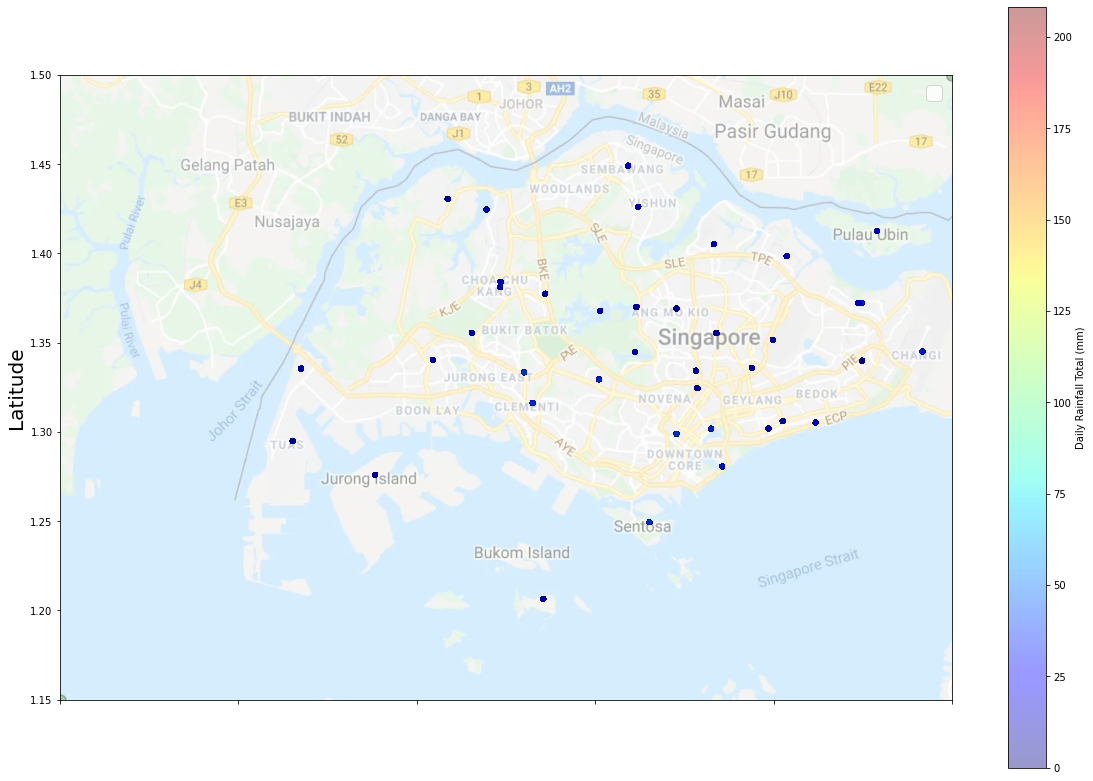

In [116]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = final_df.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

---

# Split Data Set into Years 

In [117]:
final_df['Year'].value_counts()

2015    17827
2018    17691
2014    17518
2017    17244
2016    17057
Name: Year, dtype: int64

In [118]:
df_2014 = final_df[final_df['Year']==2014]
df_2015 = final_df[final_df['Year']==2015]
df_2016 = final_df[final_df['Year']==2016]
df_2017 = final_df[final_df['Year']==2017]
df_2018 = final_df[final_df['Year']==2018]

# Plot Rainfall Heatmap By Years

## 2014

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


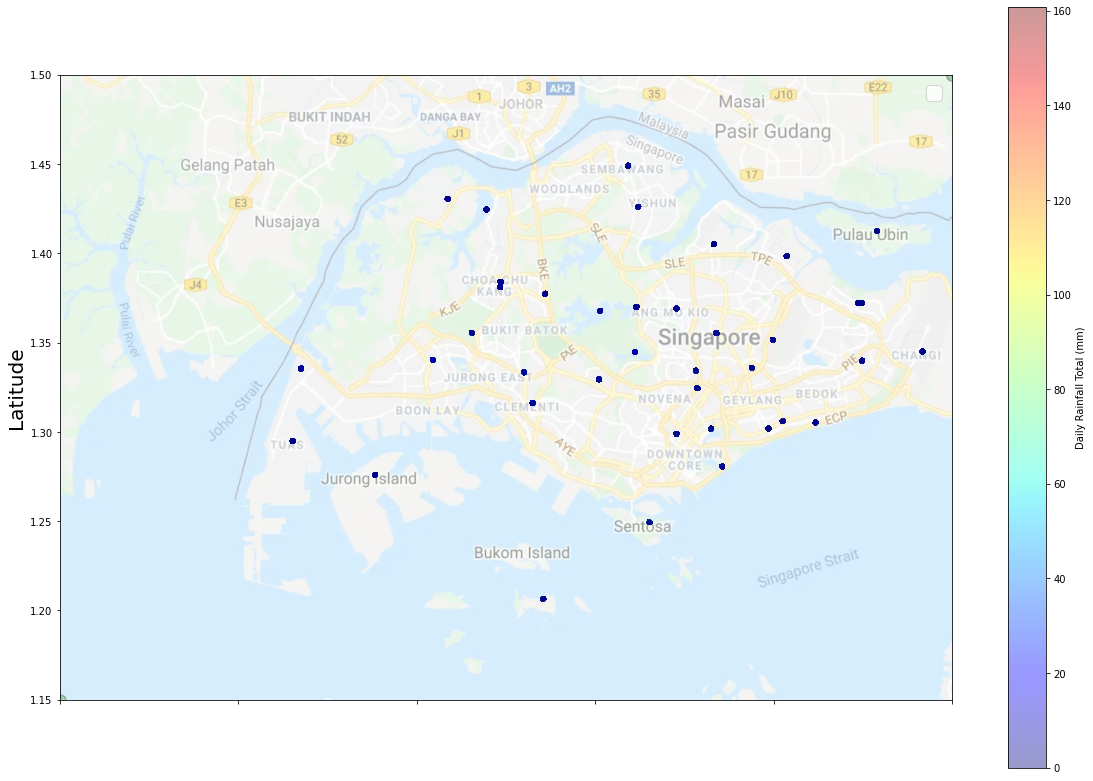

In [119]:
# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = df_2014.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

## 2015

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


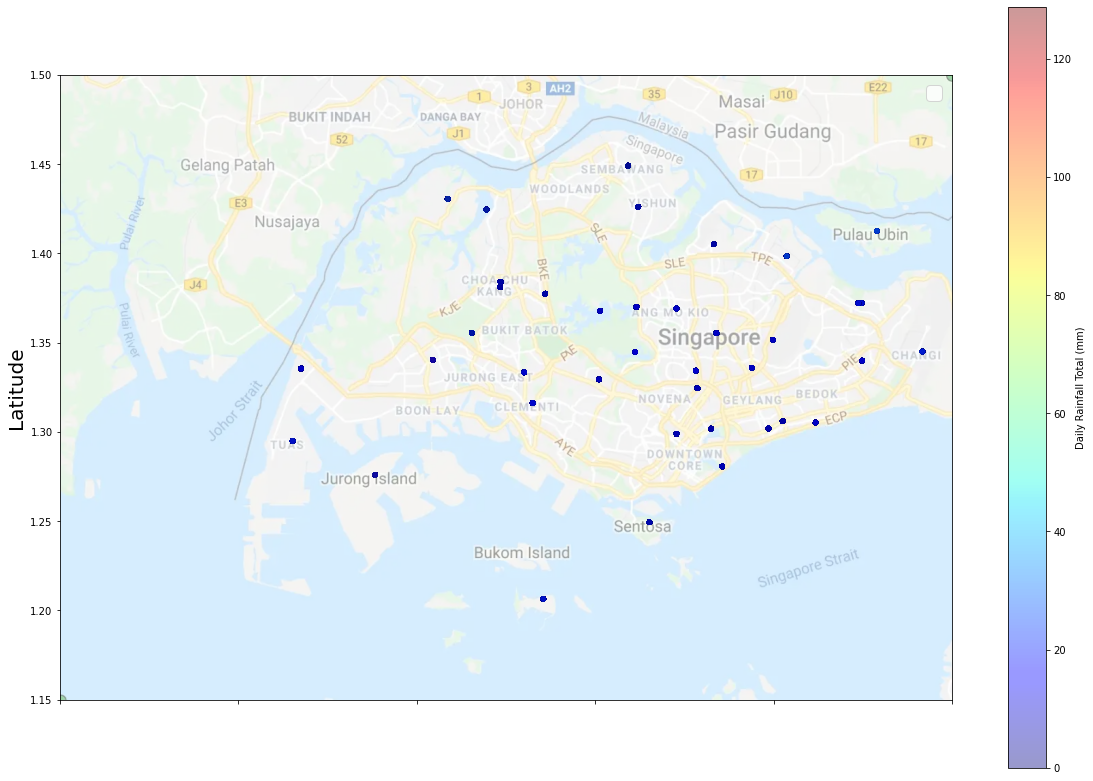

In [120]:
# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = df_2015.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

## 2016

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


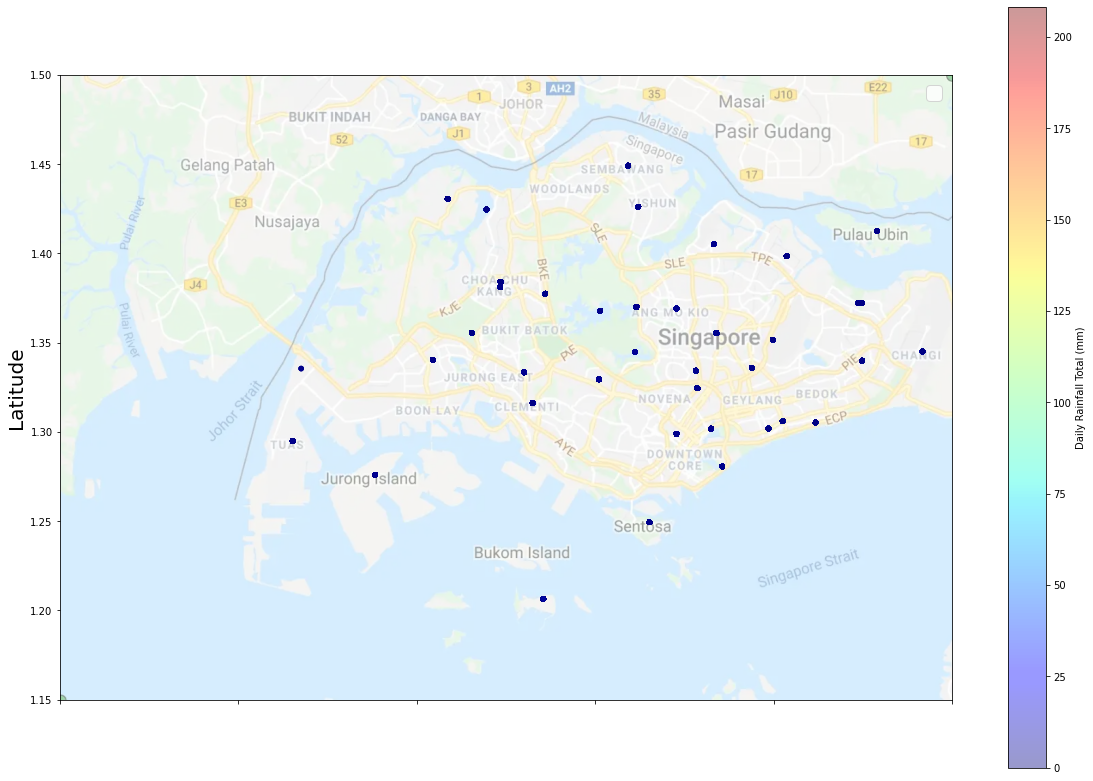

In [121]:
# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = df_2016.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

## 2017

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


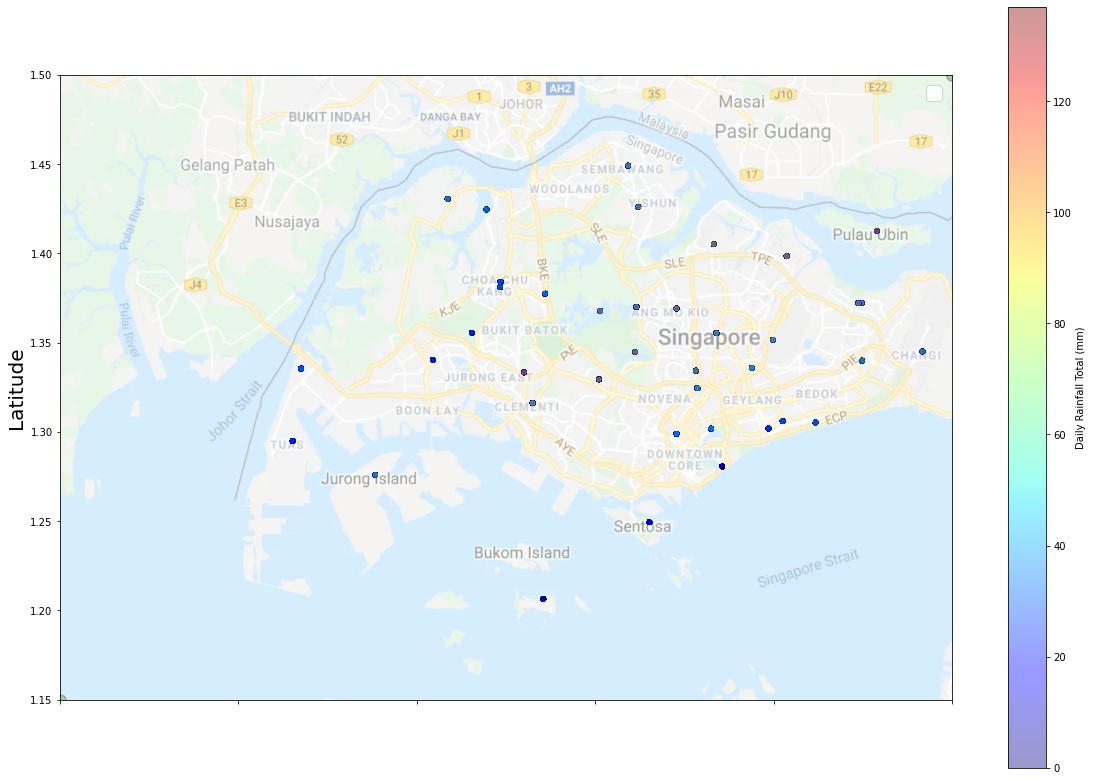

In [122]:
# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = df_2017.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

## 2018

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


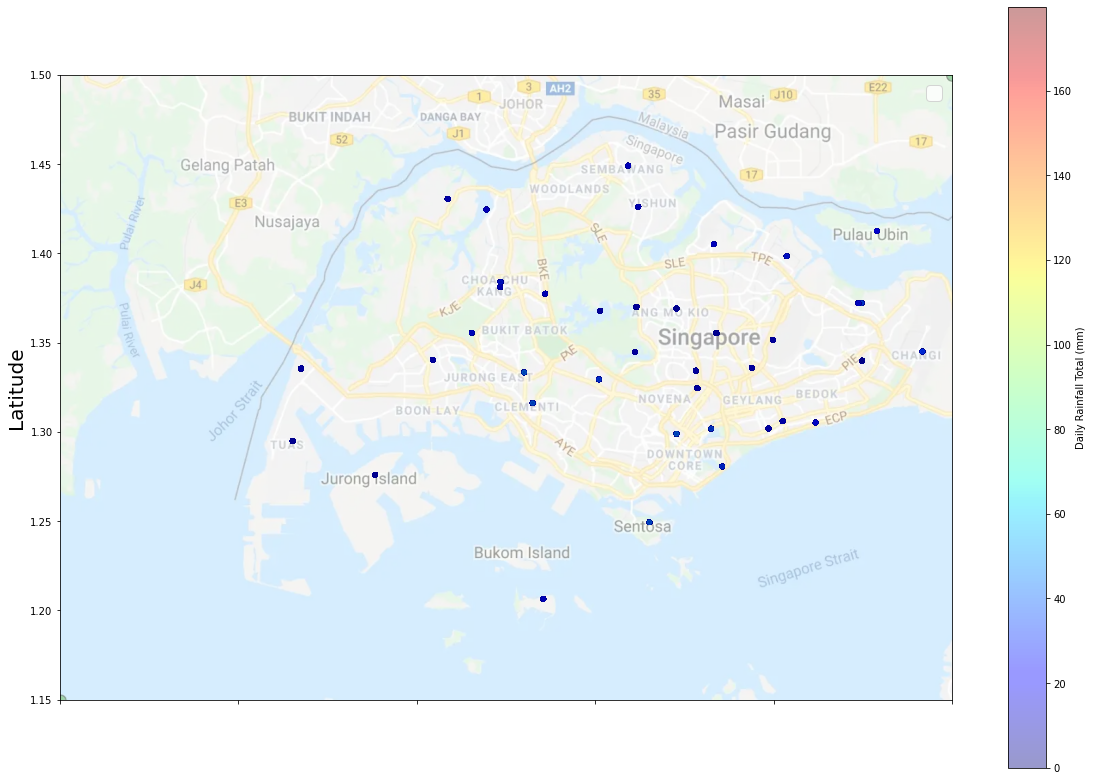

In [123]:
# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = df_2018.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(20,14),
    c="Daily Rainfall Total (mm)", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()